In [1]:
import numpy as np
import matplotlib.pyplot as plt

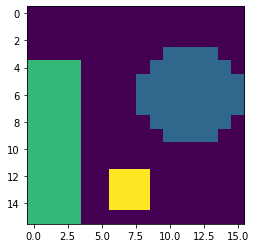

In [3]:
lb = np.zeros((16, 16))
lb[4:, :4] = 2
lb[3:10, 8:] = 1
lb[[3,4,3],[8,8,9]] = 0
lb[[8,9,9],[8,8,9]] = 0

lb[[3,4,3],[-2,-1,-1]] = 0
lb[[9,8,9],[-2,-1,-1]] = 0

lb[12:-1, 6:9] = 3
plt.imshow(lb)

In [7]:
def area(img, label=1):
    area = np.sum(img[img == label])
    return area/label

In [8]:
print(area(lb))
print(area(lb, 2))
print(area(lb, 3))

44.0
48.0
9.0


In [10]:
def centroid(img, label=1):
    pos = np.where(img==label)
    cy = np.mean(pos[0])
    cx = np.mean(pos[1])
    return cy, cx

In [13]:
c1 = centroid(lb)
c2 = centroid(lb, 2)
c3 = centroid(lb, 3)

In [14]:
print(c1, c2, c3)

(6.0, 11.5) (9.5, 1.5) (13.0, 7.0)


In [15]:
def neighbors(y, x):
    return ((y, x+1), (y+1, x), (y, x-1), (y-1, x))

In [16]:
def get_boundaries(img, label=1):
    pos = np.where(img == label)
    boundaries = []
    for y, x in zip(*pos):
        for yn, xn in neighbors(y, x):
            if yn < 0 or yn> img.shape[0] - 1:
                boundaries.append((y,x))
                break
                
            if xn < 0 or xn> img.shape[1] - 1:
                boundaries.append((y,x))
                break
                
            elif img[yn, xn] != label:
                boundaries.append((y,x))
                break    
    return boundaries

In [17]:
def draw_boundaries(img, label = 1):
    bb = np.zeros_like(img)
    bb[img == label] = 1
    for y, x in get_boundaries(bb):
        bb[y, x] = 2
    return bb

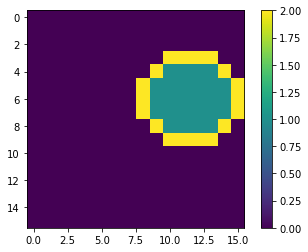

In [24]:
plt.imshow(draw_boundaries(lb))
plt.colorbar()

In [26]:
def perimetr(img, label = 1):
    return len(get_boundaries(img, label))

In [29]:
print(perimetr(lb))
print(perimetr(lb, 2))
print(perimetr(lb, 3))

18
28
8


In [30]:
def circularity(img, label = 1):
    return (perimetr(lb, label)**2)/area(img, label)

In [33]:
print(circularity(lb))
print(circularity(lb, 2))
print(circularity(lb, 3 ))

7.363636363636363
16.333333333333332
7.111111111111111


In [43]:
def distance(p1, p2):
    return ((p1[0]-p2[0])**2 +(p1[1]-p2[1])**2)**0.5

In [44]:
def radial_dist(img, label=1):
    r, c = centroid(img, label)
    bound = get_boundaries(img, label)
    K = len(bound)
    rd =0 
    for rk, ck in bound:
        rd += distance((r,c),(rk, ck))
    return rd / K

In [45]:
def std_radial(img, label = 1):
    r, c = centroid(img, label)
    bound = get_boundaries(img, label)
    K = len(bound)
    rd = radial_dist(img, label)
    sr = 0
    for rk, ck, in bound:
        sr += (distance((r,c), (rk, ck))- rd)**2
    return (sr/K)**0.5

In [46]:
def circularity_std(img, label = 1):
    return radial_dist(img, label)/std_radial(img, label)

In [48]:
print(circularity_std(lb))
print(circularity_std(lb, 2))
print(circularity_std(lb, 3))

15.38190804385473
2.494772261990279
5.828427124746188


In [49]:
def moment_rc(lb, label=1):
    A = area(lb, label)
    r, c = centroid(lb, label)
    pos = np.where(lb == label)
    mrc = np.sum((pos[0]-r)*(pos[1]-c))
    return mrc / A

In [51]:
print(moment_rc(lb))
print(moment_rc(lb, 2))
print(moment_rc(lb, 3))

0.0
0.0
0.0


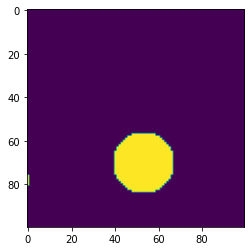

In [58]:
img = np.load('coins.npy.txt')
plt.imshow(img[300:400, 200:300])